<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/machine-learning-with-pytorch-and-scikit-learn/16-transformers/01_self_attention_mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Self-attention mechanism

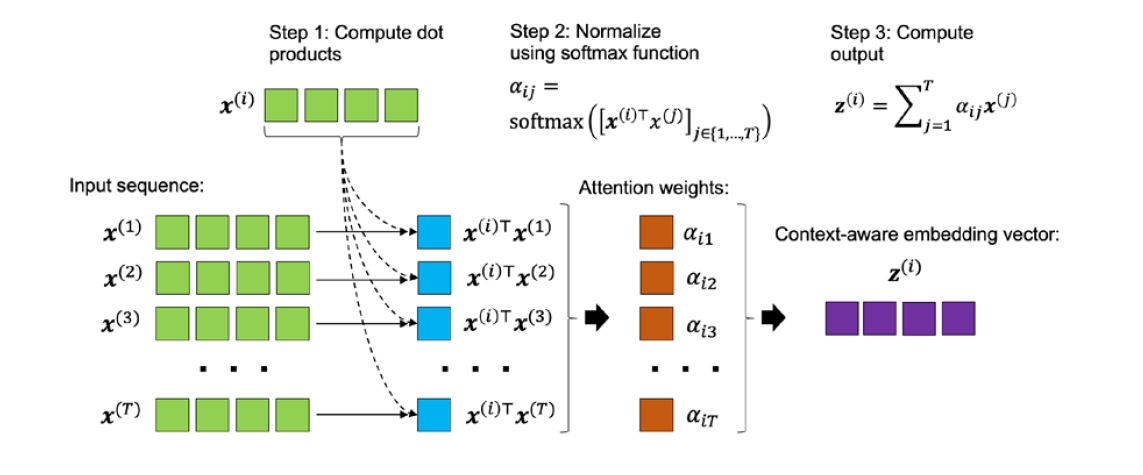

In [ ]:
import torch
import torch.nn.functional as F

Let’s assume we have an input sentence “can you help me to
translate this sentence” that has already been mapped to an integer representation via a dictionary.

In [ ]:
sentence = torch.tensor([
  0,  # can
  7,  # you
  1,  # help
  2,  # me
  5,  # to
  6,  # translate
  4,  # this
  3   # sentence
])
sentence

tensor([0, 7, 1, 2, 5, 6, 4, 3])

Let’s also assume that we already encoded this sentence into a real-number vector representation via
an embedding layer.

Here, our embedding size is 16, and we assume that the dictionary size is 10.

In [ ]:
torch.manual_seed(123)

embedding = torch.nn.Embedding(10, 16)
embedded_sentence = embedding(sentence)
embedded_sentence.shape

torch.Size([8, 16])

**Step-1: Computing the dot product**

Now, we can compute the dot product between the ith and jth word embeddings.

In [ ]:
omega = torch.empty(8, 8)
for i, x_i in enumerate(embedded_sentence):
  for j, x_j in enumerate(embedded_sentence):
    omega[i, j] = torch.dot(x_i, x_j)
print(omega.shape)
print(omega)

torch.Size([8, 8])
tensor([[ 9.7601,  1.7326,  4.7543, -1.3587,  0.4752, -1.6717,  1.0227, -0.1286],
        [ 1.7326, 16.0787,  9.0642, -0.3370,  1.1368,  1.1972,  1.6485, -1.2789],
        [ 4.7543,  9.0642, 22.6615, -0.8519,  7.7799,  2.7483, -0.6832,  1.6236],
        [-1.3587, -0.3370, -0.8519, 13.9473, -1.4198, 10.9659, -0.5887,  2.3869],
        [ 0.4752,  1.1368,  7.7799, -1.4198, 13.7511, -6.8568, -2.5114, -3.3468],
        [-1.6717,  1.1972,  2.7483, 10.9659, -6.8568, 24.6738, -3.8294,  4.9581],
        [ 1.0227,  1.6485, -0.6832, -0.5887, -2.5114, -3.8294, 15.8691,  2.0269],
        [-0.1286, -1.2789,  1.6236,  2.3869, -3.3468,  4.9581,  2.0269, 18.7382]],
       grad_fn=<CopySlices>)


In [ ]:
# let’s compute this using matrix multiplication instead
omega_mat = embedded_sentence.matmul(embedded_sentence.T)
print(omega_mat.shape)
print(omega_mat)

torch.Size([8, 8])
tensor([[ 9.7601,  1.7326,  4.7543, -1.3587,  0.4752, -1.6717,  1.0227, -0.1286],
        [ 1.7326, 16.0787,  9.0642, -0.3370,  1.1368,  1.1972,  1.6485, -1.2789],
        [ 4.7543,  9.0642, 22.6615, -0.8519,  7.7799,  2.7483, -0.6832,  1.6236],
        [-1.3587, -0.3370, -0.8519, 13.9473, -1.4198, 10.9659, -0.5887,  2.3869],
        [ 0.4752,  1.1368,  7.7799, -1.4198, 13.7511, -6.8568, -2.5114, -3.3468],
        [-1.6717,  1.1972,  2.7483, 10.9659, -6.8568, 24.6738, -3.8294,  4.9581],
        [ 1.0227,  1.6485, -0.6832, -0.5887, -2.5114, -3.8294, 15.8691,  2.0269],
        [-0.1286, -1.2789,  1.6236,  2.3869, -3.3468,  4.9581,  2.0269, 18.7382]],
       grad_fn=<MmBackward0>)


In [ ]:
# let's check that this matrix multiplication produces the expected results
torch.allclose(omega, omega_mat)

True

**Step-2: Normalization with softmax**

We can obtain the attention weights by normalizing it with softmax function.

In [ ]:
attention_weights = F.softmax(omega, dim=1)
print(attention_weights.shape)
print(attention_weights)

torch.Size([8, 8])
tensor([[9.9270e-01, 3.2398e-04, 6.6502e-03, 1.4723e-05, 9.2135e-05, 1.0766e-05,
         1.5929e-04, 5.0374e-05],
        [5.8773e-07, 9.9910e-01, 8.9788e-04, 7.4187e-08, 3.2391e-07, 3.4407e-07,
         5.4033e-07, 2.8926e-08],
        [1.6712e-08, 1.2438e-06, 1.0000e+00, 6.1412e-11, 3.4437e-07, 2.2482e-09,
         7.2703e-11, 7.3008e-10],
        [2.1438e-07, 5.9550e-07, 3.5585e-07, 9.5172e-01, 2.0167e-07, 4.8272e-02,
         4.6299e-07, 9.0760e-06],
        [1.7110e-06, 3.3158e-06, 2.5448e-03, 2.5719e-07, 9.9745e-01, 1.1195e-09,
         8.6338e-08, 3.7443e-08],
        [3.6165e-12, 6.3713e-11, 3.0052e-10, 1.1136e-06, 2.0250e-14, 1.0000e+00,
         4.1804e-13, 2.7390e-09],
        [3.5667e-07, 6.6694e-07, 6.4779e-08, 7.1194e-08, 1.0410e-08, 2.7865e-09,
         1.0000e+00, 9.7366e-07],
        [6.4013e-09, 2.0263e-09, 3.6918e-08, 7.9205e-08, 2.5622e-10, 1.0361e-06,
         5.5258e-08, 1.0000e+00]], grad_fn=<SoftmaxBackward0>)


In [ ]:
# the columns in this attention matrix should sum to 1
attention_weights.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)

**Step-3: Computing context vector**

In [ ]:
# let’s assume we are computing the context vector for the second input word
x_2 = embedded_sentence[1, :]
context_vec_2 = torch.zeros(x_2.shape)

for j in range(8):
  x_j = embedded_sentence[j, :]
  context_vec_2 += attention_weights[1, j] * x_j

print(context_vec_2.shape)
print(context_vec_2)

torch.Size([16])
tensor([-9.3975e-01, -4.6856e-01,  1.0311e+00, -2.8192e-01,  4.9373e-01,
        -1.2896e-02, -2.7327e-01, -7.6358e-01,  1.3958e+00, -9.9543e-01,
        -7.1287e-04,  1.2449e+00, -7.8077e-02,  1.2765e+00, -1.4589e+00,
        -2.1601e+00], grad_fn=<AddBackward0>)


In [ ]:
# Again, we can achieve this more efficiently by using matrix multiplication
context_vectors = torch.matmul(attention_weights, embedded_sentence)
print(context_vectors.shape)
print(context_vectors)

torch.Size([8, 16])
tensor([[ 3.3420e-01, -1.8324e-01, -3.0218e-01, -5.7772e-01,  3.5662e-01,
          6.6452e-01, -2.0998e-01, -3.7798e-01,  7.6537e-01, -1.1946e+00,
          6.9960e-01, -1.4067e+00,  1.7021e-01,  1.8838e+00,  4.8729e-01,
          2.4730e-01],
        [-9.3975e-01, -4.6856e-01,  1.0311e+00, -2.8192e-01,  4.9373e-01,
         -1.2896e-02, -2.7327e-01, -7.6358e-01,  1.3958e+00, -9.9543e-01,
         -7.1287e-04,  1.2449e+00, -7.8077e-02,  1.2765e+00, -1.4589e+00,
         -2.1601e+00],
        [-7.7021e-02, -1.0205e+00, -1.6895e-01,  9.1776e-01,  1.5810e+00,
          1.3010e+00,  1.2753e+00, -2.0095e-01,  4.9647e-01, -1.5723e+00,
          9.6657e-01, -1.1481e+00, -1.1589e+00,  3.2547e-01, -6.3151e-01,
         -2.8400e+00],
        [-1.3679e+00,  1.0614e-01, -2.1317e+00,  1.0480e+00, -3.7127e-01,
         -9.1234e-01, -4.3802e-01, -1.0329e+00,  9.3425e-01,  1.5453e+00,
          5.7218e-01, -1.8049e-01, -6.0454e-03, -8.8691e-02,  2.0559e-01,
         -5.2292e-01],


In [ ]:
torch.allclose(context_vec_2, context_vectors[1])

True